In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

Tc = 37 #время между звонками клиента
Ts = 213 #время обслуживания 
Tw = 591 #среднее приемлемое время ожидания

l = 1/Tc #интенсивность прихода заявок
m = 1/Ts #интенсивность обслуживания 
nu = 1/Tw #интенсивность отказа

# Задание 1

Рассмотреть систему без очереди. Построить графики от числа операторов: вероятности отказа (вплоть до обеспечения отказов менее 1%); математического ожидания числа занятых операторов; коэффициента загрузки операторов.

In [12]:
def count_P0 (n, q):
    s = 1
    for i in range (1, n+1):
        s = s + ((l**i) / (m**i) /  math.factorial(i))
    koeff = (l**n) / (m**n) / math.factorial(n)    
    for i in range (1, q+1):
        s = s + ( koeff * (l**i) / (m**i) / (n**i))   
    p = 1 / s
    return(p)


def count_P (n, q, P0, flag):
    p = (l**n) / (m**n) /  math.factorial(n) * P0
    if flag:
        p = p * (l**q) / (m**q) / (n**q)
    return(p)

def N_math_exp (n, q, p0):
    N_sr = 0
    for j in range (1, n+1):
        N_sr = N_sr + j*count_P(j, q, p0, 0)
    if (n>0):
        for i in range (1, q+1):
            N_sr = N_sr + n*count_P(n, i, p0, 1)
        
    return(N_sr)

def Z_math_exp (n, q, p0):
    Z_sr = 0
    for j in range (1, n+q+1):
        Z_sr = Z_sr + j*count_P(j, q, p0, 0)
    
    for i in range (1, q+1):
        Z_sr = Z_sr + (i+n)*count_P(n, i, p0, 1)
        
    return(Z_sr)

def Prob_q (n, q, p0):
    Pq = 0
    for i in range (1, q+1):
        Pq = Pq + count_P(n, i, p0, 1)
        
    return(Pq)

def Q_math_exp (n, q, p0):
    Q_sr = 0
    for i in range (1, q+1):
        Q_sr = Q_sr + i*count_P(n, i, p0, 1)
    return(Q_sr)


def plot(firstDataset, secondDataset, inf1, inf2):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
    axes.set_xlabel(inf1, fontsize=12)
    axes.set_ylabel(inf2, fontsize=12)
    axes.grid()
    axes.plot(firstDataset, secondDataset)

    
def plot_queue(axes, firstDataset, secondDataset, inf1, inf2, num):
    axes.set_xlabel(inf1, fontsize=12)
    axes.set_ylabel(inf2, fontsize=12)
    axes.plot(firstDataset, secondDataset, label=("Для "+ str(num)+" операторов"))
    axes.legend()
    
def plot_oper(axes, firstDataset, secondDataset, inf1, inf2, num):
    axes.set_xlabel(inf1, fontsize=12)
    axes.set_ylabel(inf2, fontsize=12)
    axes.plot(firstDataset, secondDataset, label=("Для очереди длиной "+ str(num)))
    axes.legend()

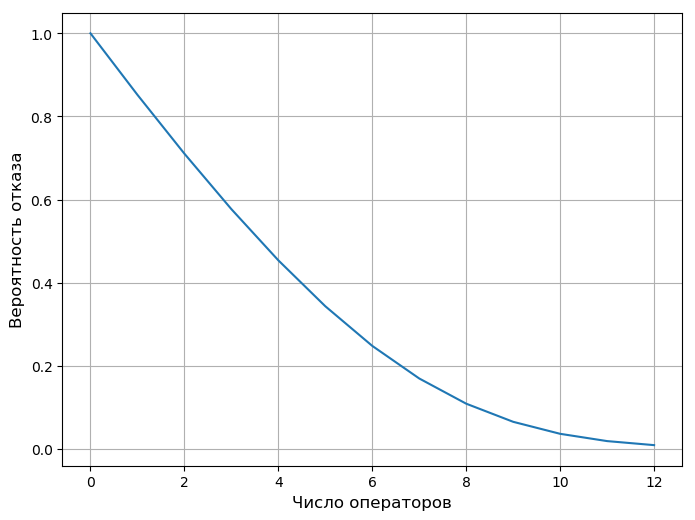

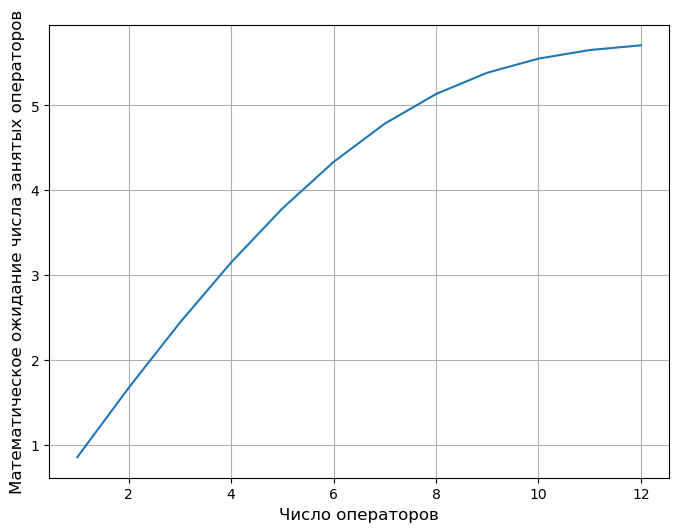

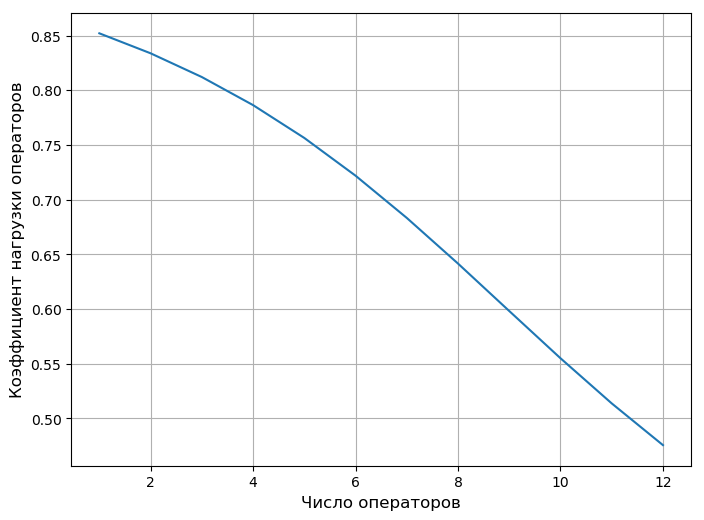

In [13]:
p = []
p.append(1)
i = 0
p0 = []
p0.append(1)
while (p[i] > 0.01):
    p0.append(count_P0(i+1, 0))
    p_otk = count_P(i+1, 0, p0[i+1], 0)
    p.append(p_otk)
    i = i+1
    
num = [i for i in range (len(p))]
plot(num, p, "Число операторов", "Вероятность отказа")

N = []
#Подсчет среднего числа занятых операторов
for i in range (1, len(num)):
    N_sr =  N_math_exp (i, 0, p0[i])
    N.append(N_sr)
num = [i for i in range (1, len(p))]
plot(num, N, "Число операторов", "Математическое ожидание числа занятых операторов")

#подсчет коэффициента загрузки операторов
koeff = []
for i in range (1, len(num)+1):
    koeff.append(N[i-1]/i)
plot(num, koeff, "Число операторов", "Коэффициент нагрузки операторов")
plt.show()

# Задание 2

Рассмотреть систему с ограниченной очередью. Варьируя число операторов (вплоть до числа каналов, соответствующего 1% отказов в системе без очереди), построить семейства графиков от числа мест в очереди: вероятности отказа; математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди; коэффициента занятости мест в очереди. Варьируя число место в очереди, построить семейства графиков от числа операторов: вероятности отказа; математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди; коэффициента занятости мест в очереди.

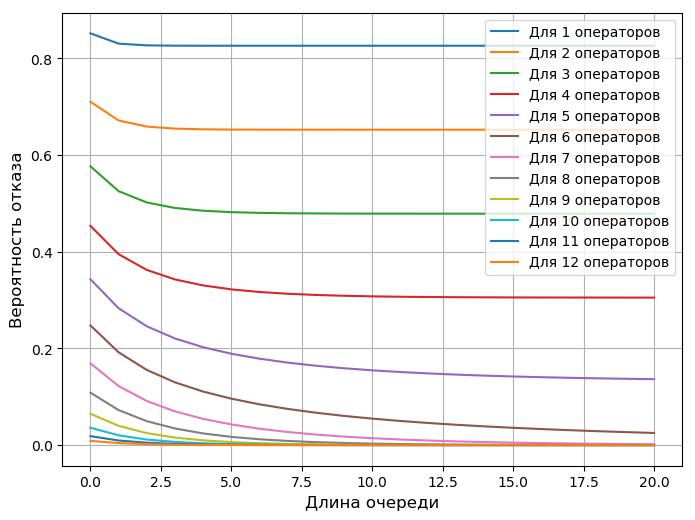

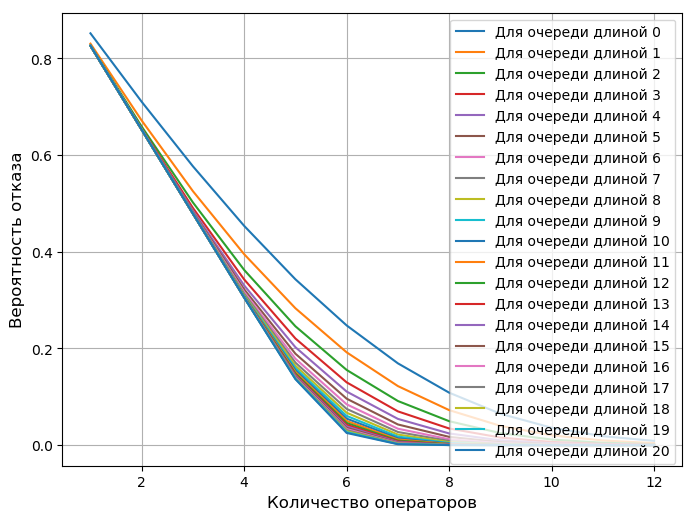

In [14]:
max_len = len(p) 

p = []
p.append([])
p[0].append(1)
q = 0
p0 = []
p0.append([])
p0[0].append(1)
p0.append([])
p.append([])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, max_len - 1):
    q=0
    while (q<21):
        p0[i+1].append(count_P0(i+1, q))
        p_otk = count_P(i+1, q, p0[i+1][q], 1)
        p[i+1].append(p_otk)
        q = q+1
    p0.append([])
    p.append([]) 
    num = [j for j in range (len(p[i+1]))]
    plot_queue(axes, num, p[i+1], "Длина очереди", "Вероятность отказа", i+1)
axes.grid()
plt.show()

num2 =  [j for j in range (1, max_len)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, 21):
    list_p = []
    for k in range (1, max_len):
        list_p.append(p[k][i])
    plot_oper(axes, num2, list_p, "Количество операторов", "Вероятность отказа", i)
axes.grid()
plt.show()

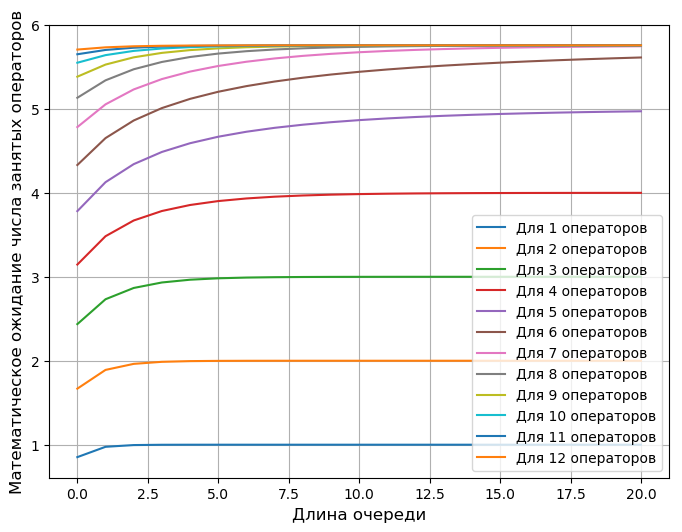

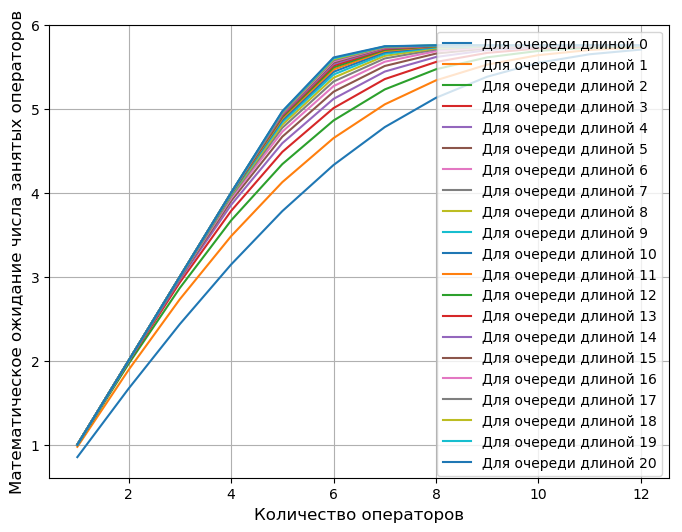

In [15]:
N = []
N.append([])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (1, max_len):
    q=0
    while (q<21):
        N_sr =  N_math_exp(i, q, p0[i][q])
        N[i-1].append(N_sr)
        q = q+1
    N.append([])
    num = [j for j in range (q)]
    plot_queue(axes, num, N[i-1], "Длина очереди", "Математическое ожидание числа занятых операторов", i)
axes.grid()
plt.show()
    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, 21):
    list_N = []
    for k in range (0, max_len-1):
        list_N.append(N[k][i])
    plot_oper(axes, num2, list_N, "Количество операторов", "Математическое ожидание числа занятых операторов", i)
axes.grid()
plt.show()


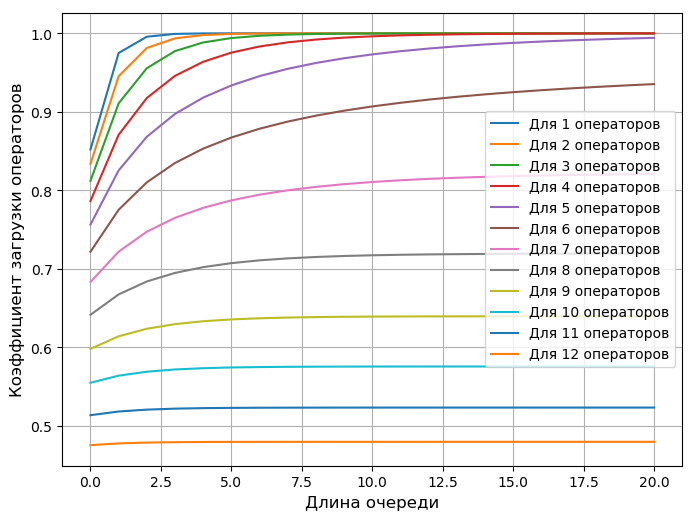

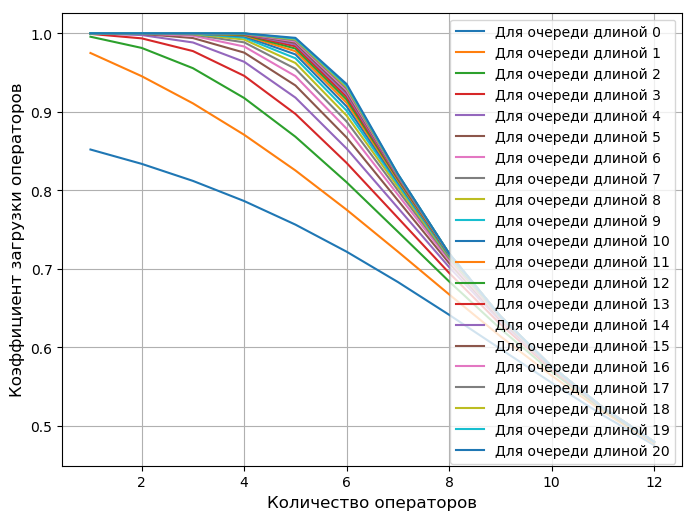

In [16]:
N_coeff = []
N_coeff.append([])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (1, max_len):
    q=0
    while (q<21):
        N_coeff[i-1].append(N[i-1][q]/i)
        q = q+1
    N_coeff.append([])
    plot_queue(axes, num, N_coeff[i-1], "Длина очереди", "Коэффициент загрузки операторов", i)
axes.grid()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, 21):
    list_N_coeff = []
    for k in range (0, max_len-1):
        list_N_coeff.append(N_coeff[k][i])
    plot_oper(axes, num2, list_N_coeff, "Количество операторов", "Коэффициент загрузки операторов", i)
axes.grid()
plt.show()


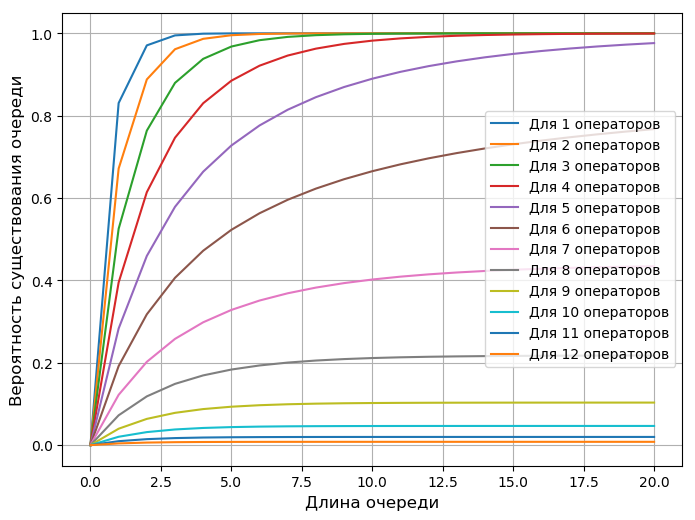

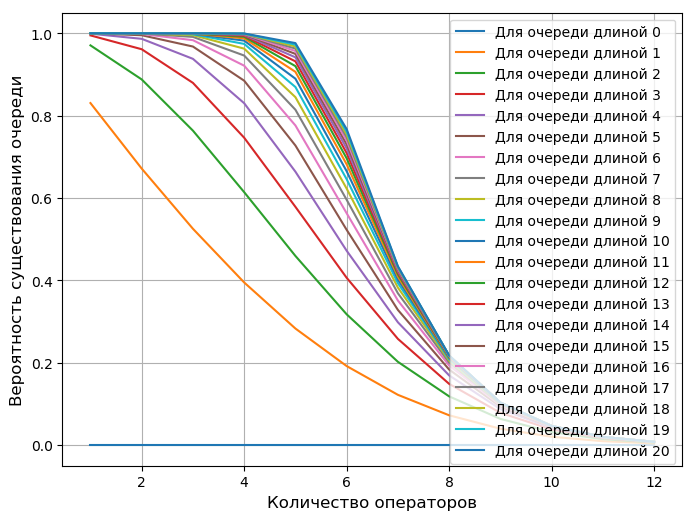

In [17]:
Pq = []
Pq.append([])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (1, max_len):
    q=0
    while (q<21):
        Pq[i-1].append(Prob_q(i, q, p0[i][q]))
        q = q+1
    Pq.append([])
    plot_queue(axes, num, Pq[i-1], "Длина очереди", "Вероятность существования очереди", i)
axes.grid()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, 21):
    list_Pq = []
    for k in range (0, max_len-1):
        list_Pq.append(Pq[k][i])
    plot_oper(axes, num2, list_Pq, "Количество операторов", "Вероятность существования очереди", i)
axes.grid()
plt.show()

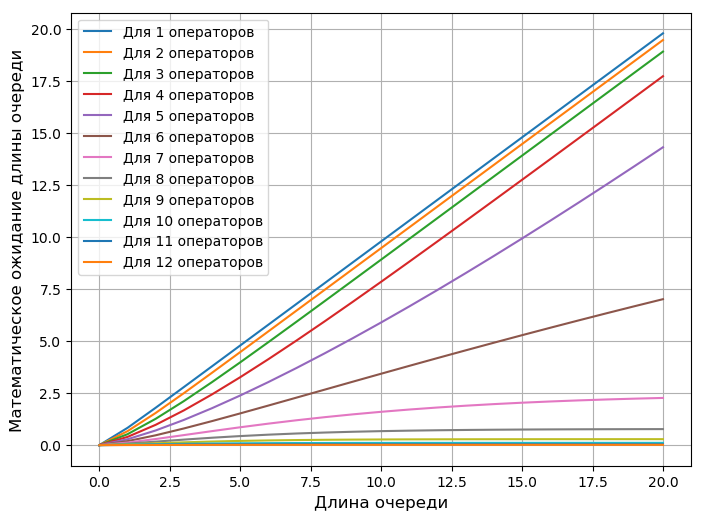

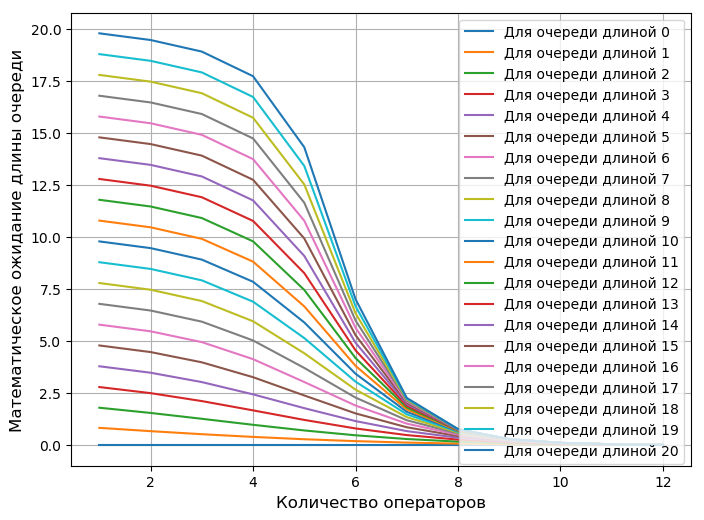

In [18]:
Q = []
Q.append([])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (1, max_len):
    q=0
    while (q<21):
        Q[i-1].append(Q_math_exp(i, q, p0[i][q]))
        q = q+1
    Q.append([])
    plot_queue(axes, num, Q[i-1], "Длина очереди", "Математическое ожидание длины очереди", i)
axes.grid()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, 21):
    list_Q = []
    for k in range (0, max_len-1):
        list_Q.append(Q[k][i])
    plot_oper(axes, num2, list_Q, "Количество операторов", "Математическое ожидание длины очереди", i)
axes.grid()
plt.show()

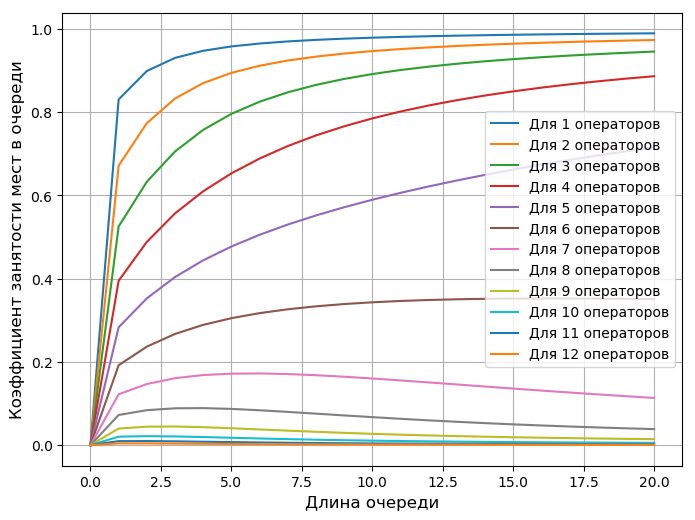

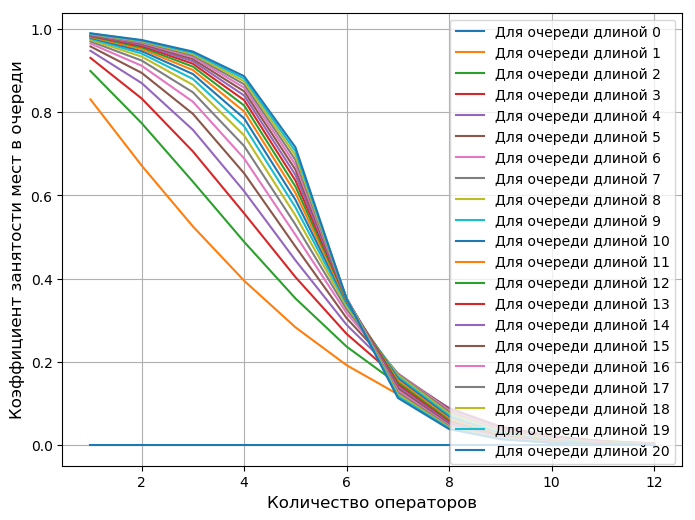

In [19]:
Q_coeff = []
Q_coeff.append([])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (1, max_len):
    q=0
    while (q<21):
        if q>0:
            Q_coeff[i-1].append(Q[i-1][q]/q)
        else:
            Q_coeff[i-1].append(0)
        q = q+1
    Q_coeff.append([])
    plot_queue(axes, num, Q_coeff[i-1], "Длина очереди", "Коэффициент занятости мест в очереди", i)
axes.grid()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
for i in range (0, 21):
    list_Q_coeff = []
    for k in range (0, max_len-1):
        list_Q_coeff.append(Q_coeff[k][i])
    plot_oper(axes, num2, list_Q_coeff, "Количество операторов", "Коэффициент занятости мест в очереди", i)
axes.grid()
plt.show()

# Задание 3

Рассмотреть систему без ограничений на длину очереди. Построить графики от числа операторов (вплоть до числа каналов, соответствующего 1% отказов в системе без очереди): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.

In [20]:
def t3_count_P0 (n, q):
    a = l / n / m
    s = 1
    for i in range (1, n+1):
        s = s + ((l**i) / (m**i) /  math.factorial(i))
    koeff = (l**n) / (m**n) / math.factorial(n)    
    s = s + ( koeff * a / (1-a))   
    p = 1 / s
    return(p)



def t3_N_math_exp (n, q, p0):
    N_sr = 0
    a = l / n / m
    for j in range (1, n+1):
        N_sr = N_sr + j*count_P(j, q, p0, 0)
    N_sr = N_sr +  n * count_P(n, q, p0, 0) * a / (1-a)
        
    return(N_sr)

def t3_Q_math_exp (n, q, p0):
    a = l / n / m
    Q_sr = count_P(n, q, p0, 0) * a / (1-a) / (1-a)
    return(Q_sr)

def t3_Prob_q (n, q, p0):
    a = l / n / m
    Pq = count_P(n, q, p0, 0) * a / (1-a)
        
    return(Pq)

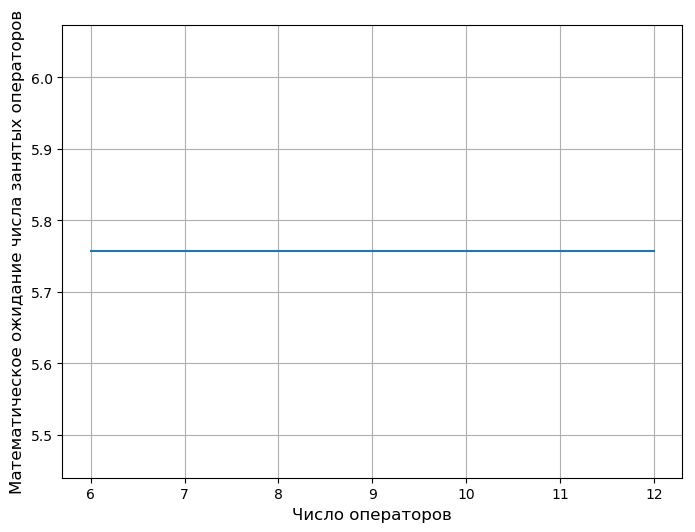

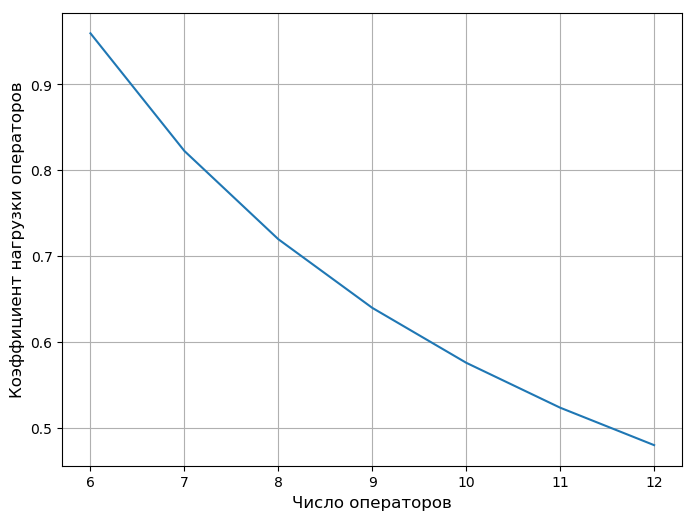

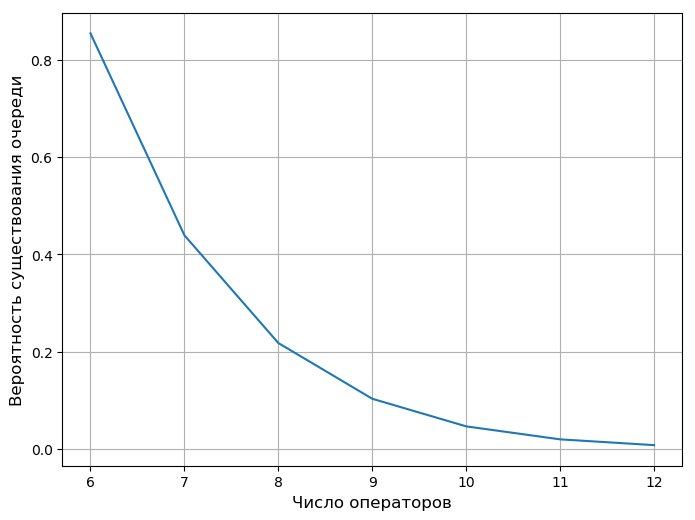

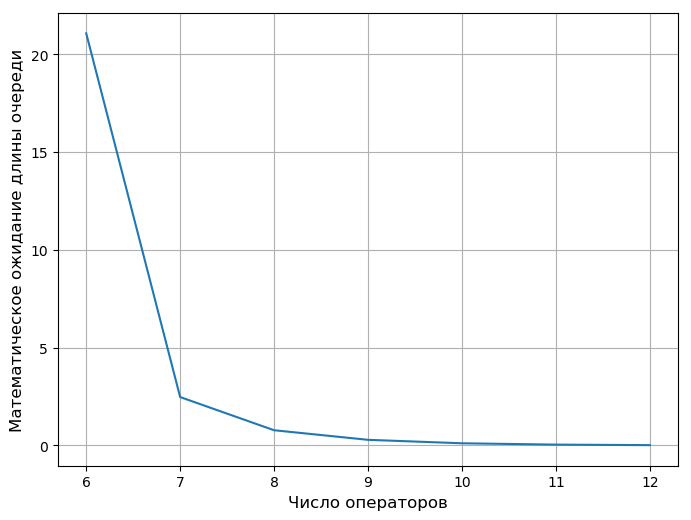

In [41]:
p0 = []
p0.append(1)
board = 0

for i in range (1, max_len-1):
    a = l / i / m
    if (a<1):
        board = i - 1
        break

        
for i in range (0, max_len-1):
    a = l / (i+1) / m
    if (a>1):
        p0.append(count_P0(i+1, 50))
    else:
        p0.append(t3_count_P0(i+1, 0))

num = [i for i in range (1, max_len)]

N = []
#Подсчет среднего числа занятых операторов
for i in range (1, len(num)+1):
    a = l / i / m
    if (a>1):
        N_sr =  N_math_exp(i, 50, p0[i])
    else:
        N_sr =  t3_N_math_exp(i, 0, p0[i])
    N.append(N_sr)
plot(num[board:], N[board:], "Число операторов", "Математическое ожидание числа занятых операторов")

#подсчет коэффициента загрузки операторов
koeff = []
for i in range (1, len(num)+1):
    koeff.append(N[i-1]/i)
plot(num[board:], koeff[board:], "Число операторов", "Коэффициент нагрузки операторов")



#Подсчет вероятности существования очереди
P_q = []
for i in range (1, len(num)+1):
    a = l / i / m
    if (a>1):
        P_q.append(Prob_q (i, 50, p0[i]))
    else:
        P_q.append(t3_Prob_q (i, 0, p0[i]))
plot(num[board:], P_q[board:], "Число операторов", "Вероятность существования очереди")


#Подсчет математического ожидания длины очереди
Q = []
for i in range (1, len(num)+1):
    a = l / i / m
    if (a>1):
        Q.append(Q_math_exp(i, 50, p0[i]))
    else:
        Q.append(t3_Q_math_exp(i, 0, p0[i]))
plot(num[board:], Q[board:], "Число операторов", "Математическое ожидание длины очереди")
plt.show()

# Задание 4

Рассмотреть систему без ограничений на длину очереди, учитывающей фактор ухода клиентов из очереди (среднее приемлемое время ожидания – Tw секунд). Построить графики от числа операторов (вплоть до числа каналов, соответствующего 1% отказов в системе без очереди): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.

In [22]:
def t4_count_P0 (n, q):
    s = 1
    koeff = ((l**n) / (m**n) /  math.factorial(n))
    for i in range (1, n+1):
        s = s + ((l**i) / (m**i) /  math.factorial(i)) 
    for i in range (1, q+1):
        s = s + koeff * l / (m * n + i * nu)  
        koeff = koeff * l / (m * n + i * nu)
    p = 1 / s
    return(p)



def t4_count_P (n, q, P0, flag):
    p = (l**n) / (m**n) /  math.factorial(n) * P0
    if flag:
        for i in range (1, q+1): 
            p = p * l / (m * n + i * nu) 
    return(p)


def t4_N_math_exp (n, q, p0):
    N_sr = 0
    for j in range (1, n+1):
        N_sr = N_sr + j * t4_count_P(j, q, p0, 0)
    for i in range (1, q+1):
        N_sr = N_sr + n * t4_count_P(n, i, p0, 1)    
    return(N_sr)


def t4_Q_math_exp (n, q, p0):
    Q_sr = 0
    for i in range (1, q+1):
        Q_sr = Q_sr + i * t4_count_P(n, i, p0, 1)
    return(Q_sr)

def t4_Prob_q (n, q, p0):
    Pq = 0
    for i in range (1, q+1):
        Pq = Pq + t4_count_P(n, i, p0, 1)        
    return(Pq)





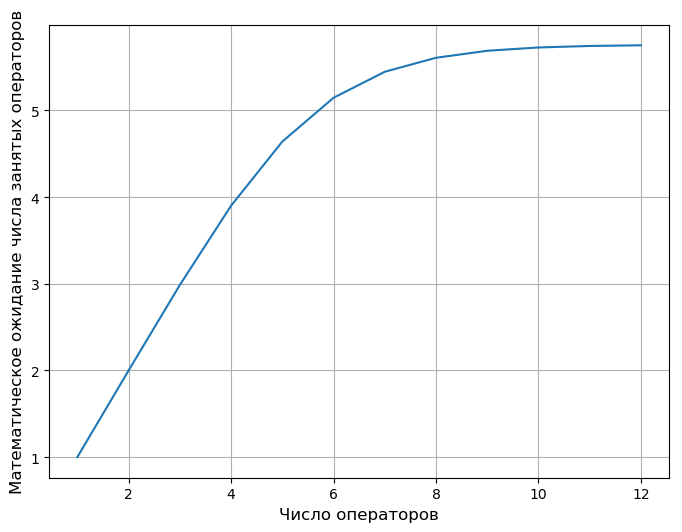

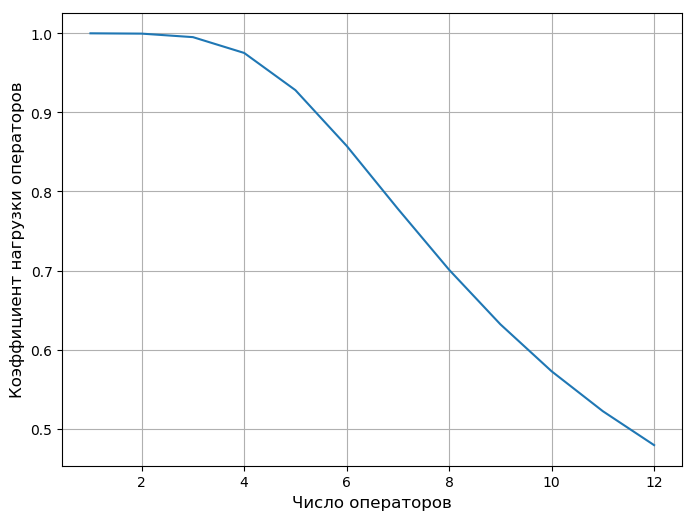

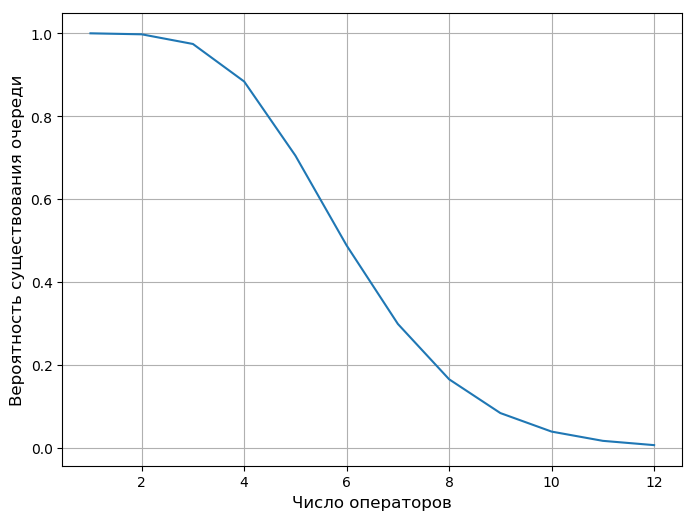

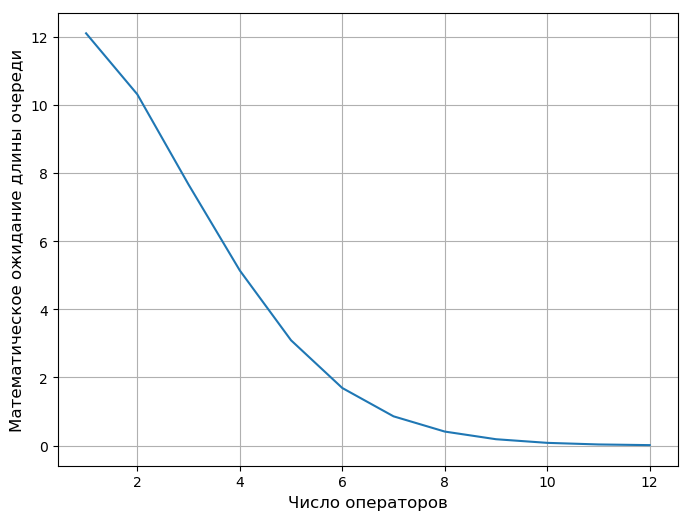

In [24]:
p0 = []
que = []
p0.append(1)
eps = 0.000001
que.append(1) 
for i in range (0, max_len-1):
    q = 1
    last = 1 
    temp = t4_count_P0(i+1, 1)
    q = 2
    while (last - temp) > eps: 
        last = temp
        temp = t4_count_P0(i+1, q)
        q = q + 1
    que.append(q-1)
    p0.append(temp)
num = [i for i in range (1, max_len)]

N = []
#Подсчет среднего числа занятых операторов
for i in range (1, len(num)+1):
    N_sr =  t4_N_math_exp(i, que[i], p0[i])
    N.append(N_sr)
plot(num, N, "Число операторов", "Математическое ожидание числа занятых операторов")

#подсчет коэффициента загрузки операторов
koeff = []
for i in range (1, len(num)+1):
    koeff.append(N[i-1]/i)
plot(num, koeff, "Число операторов", "Коэффициент нагрузки операторов")



#Подсчет вероятности существования очереди
P_q = []
for i in range (1, len(num)+1): 
    P_q.append(t4_Prob_q (i, que[i], p0[i]))
plot(num, P_q, "Число операторов", "Вероятность существования очереди")


#Подсчет математического ожидания длины очереди
Q = []
for i in range (1, len(num)+1): 
    Q.append(t4_Q_math_exp(i, que[i], p0[i]))
    
plot(num, Q, "Число операторов", "Математическое ожидание длины очереди")
plt.show()

In [25]:
(190**4 - 120/0.3)*1780

2319713088000.0